# Funciones de distribución de probabilidades

## Distribución uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 0
b = 200
n = 1000000
data = np.random.uniform(a, b, n)

(array([100332., 100387.,  99771.,  99842., 100082., 100100.,  99606.,
         99985., 100081.,  99814.]),
 array([5.50720961e-04, 2.00004764e+01, 4.00004020e+01, 6.00003277e+01,
        8.00002533e+01, 1.00000179e+02, 1.20000105e+02, 1.40000030e+02,
        1.59999956e+02, 1.79999882e+02, 1.99999807e+02]),
 <BarContainer object of 10 artists>)

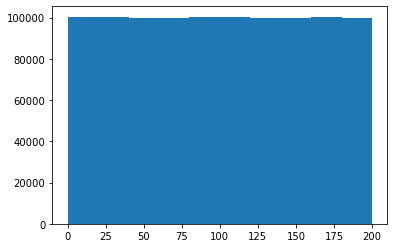

In [3]:
%matplotlib inline
plt.hist(data)

## Distrubución Normal

In [4]:
data = np.random.randn(1000000)

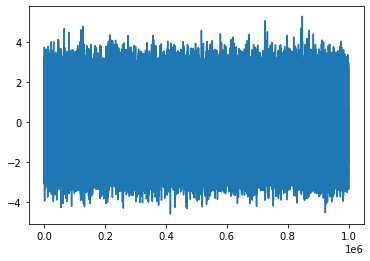

In [5]:
x = range(1,1000001)
plt.plot(x,data)

(array([1.51000e+02, 4.31000e+03, 4.72380e+04, 2.09397e+05, 3.77101e+05,
        2.71710e+05, 8.01990e+04, 9.41700e+03, 4.60000e+02, 1.70000e+01]),
 array([-4.60027179, -3.60974137, -2.61921094, -1.62868052, -0.63815009,
         0.35238033,  1.34291075,  2.33344118,  3.3239716 ,  4.31450203,
         5.30503245]),
 <BarContainer object of 10 artists>)

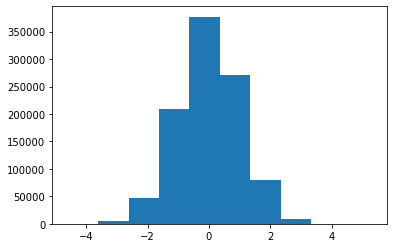

In [6]:
plt.hist(data)

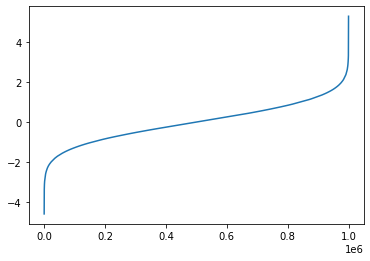

In [7]:
plt.plot(x, sorted(data))

(array([   9.,   97.,  534., 1573., 2752., 2852., 1586.,  483.,  101.,
          13.]),
 array([-4.20885212, -2.27140435, -0.33395658,  1.60349119,  3.54093896,
         5.47838673,  7.4158345 ,  9.35328227, 11.29073004, 13.22817781,
        15.16562558]),
 <BarContainer object of 10 artists>)

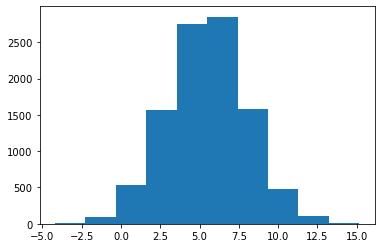

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000  # Z= (X- mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data )

In [9]:
data = np.random.randn(2,4)
data

array([[ 3.27008725e-01,  1.47767556e+00,  2.33426563e+00,
         4.60166118e-01],
       [ 7.70504036e-02,  2.34446930e-01,  1.94795761e-03,
        -2.83267058e-01]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniformes (misma probabilidad) x e y entre 0 y 1 en total 1000 veces.
* Calcularemos x * x + y * y
    * Si el valor es inferior a 1-> estamos dentro del círculo
    * Si el valor es superior a 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de pi
* Repetimos el experimento un número suficiente de veces (por ejemplo 1000), para obetener (por ejemplo 1000) diferentes aproximaciones de pi. 
* Calculamos el promedio de los 1000 experimentos anteriores para dar un valor final de pi.


In [10]:
def pi_montecarlo (n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z= np.sqrt (x[j]*x[j] + y[j]*y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = (float_value * 4) /  n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.14066


(3.14066, [<matplotlib.lines.Line2D at 0x1bfdcb81040>])

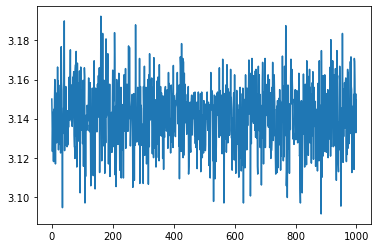

In [11]:
pi_montecarlo(10000, 1000)

## Dummy Data Sets

In [18]:
#Creamos un dataframe con tres tipos de datos
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),            #Datos con distribución normal 0 - 1
        'B' : 1.5+ 2.5 * np.random.randn(n), #Datos con media 1.5, desviación típica 2.5 y distribución normal 0 - 1
        'C' : np.random.uniform(5, 32, n)    #Datos con distribución uniforme 5 - 65 y 10
    }
)

In [20]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000308,1.499658,18.490191
std,0.998414,2.497902,7.797024
min,-4.696527,-10.614201,5.000039
25%,-0.674250,-0.185116,11.738018
50%,-0.000222,1.500580,18.488572
75%,0.671751,3.179297,25.238638
max,5.020747,13.342638,31.999964


(array([1.03000e+02, 2.84500e+03, 3.44480e+04, 1.71495e+05, 3.55594e+05,
        3.07544e+05, 1.10432e+05, 1.65380e+04, 9.73000e+02, 2.80000e+01]),
 array([-4.69652664, -3.72479924, -2.75307184, -1.78134443, -0.80961703,
         0.16211038,  1.13383778,  2.10556518,  3.07729259,  4.04901999,
         5.02074739]),
 <BarContainer object of 10 artists>)

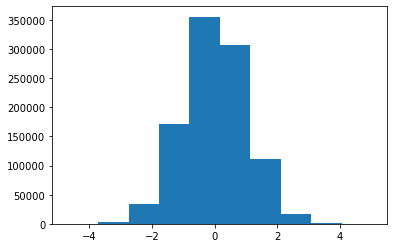

In [21]:
plt.hist(data["A"])

(array([4.40000e+01, 1.68700e+03, 2.23540e+04, 1.31483e+05, 3.22608e+05,
        3.39175e+05, 1.51323e+05, 2.89700e+04, 2.27200e+03, 8.40000e+01]),
 array([-10.61420122,  -8.21851728,  -5.82283334,  -3.42714941,
         -1.03146547,   1.36421847,   3.7599024 ,   6.15558634,
          8.55127028,  10.94695421,  13.34263815]),
 <BarContainer object of 10 artists>)

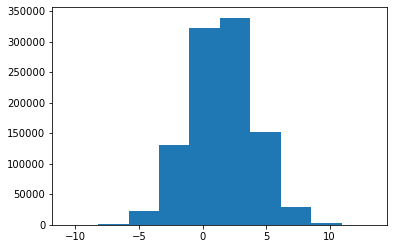

In [22]:
plt.hist(data["B"])

(array([100074., 100720.,  99889.,  99938.,  99819., 100209.,  99658.,
         99862.,  99840.,  99991.]),
 array([ 5.00003872,  7.70003129, 10.40002385, 13.10001641, 15.80000897,
        18.50000154, 21.1999941 , 23.89998666, 26.59997922, 29.29997179,
        31.99996435]),
 <BarContainer object of 10 artists>)

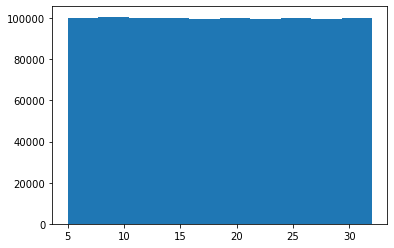

In [23]:
plt.hist(data["C"])

In [24]:
mainpath = "C:/Users/kmurg/OneDrive/Escritorio/Kev/1-Cursos/Machine Learning/python-ml-course-master/datasets"
data = pd.read_csv(mainpath+"/"+"customer-churn-model/Customer Churn Model.txt")

In [25]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [26]:
colum_names = data.columns.values.tolist()
a = len(colum_names)

In [29]:
new_data = pd.DataFrame(
    {
            'Column Name' : colum_names,
            'A': np.random.rand(a),
            'B': np.random.uniform(0,1,a)
    }, index = range(42, 42 +a) #Es muy útil hacer esto para empalmar dataframes.
)
new_data

,Column Name,A,B
42,State,0.408929,0.051290
43,Account Length,0.819972,0.979460
44,Area Code,0.431993,0.211137
45,Phone,0.722553,0.092741
46,Int'l Plan,0.646148,0.327428
47,VMail Plan,0.787446,0.406650
48,VMail Message,0.668716,0.247856
49,Day Mins,0.253576,0.162338
50,Day Calls,0.448519,0.874966
51,Day Charge,0.241442,0.716534
